First 5 rows:
                    device_id  moisture  temperature flow_rate
timestamp                                                     
2024-06-01 00:00:00       S01      45.2         20.1       0.0
2024-06-01 01:00:00       S01      44.9         19.4       0.0
2024-06-01 02:00:00       S01      44.6         18.9       0.0
2024-06-01 03:00:00       S01      44.3         18.5       0.0
2024-06-01 04:00:00       S01      44.0         18.3       0.0
Index info:
datetime64[ns]
Sensor S01 has 168 hourly readings
Dail averages for S01:
             moisture  temperature  flow_rate
timestamp                                    
2024-06-01  44.975000    21.650000   0.116667
2024-06-02  42.820833    21.400000   0.129167
2024-06-03  41.066667    21.283333   0.086364
2024-06-04  39.208333    21.254167   0.116667
2024-06-05  37.312500    21.254167   0.129167
2024-06-06  35.412500    21.254167   0.116667
2024-06-07  33.512500    21.254167   0.116667
Daily index (days only):
DatetimeIndex(['2024-

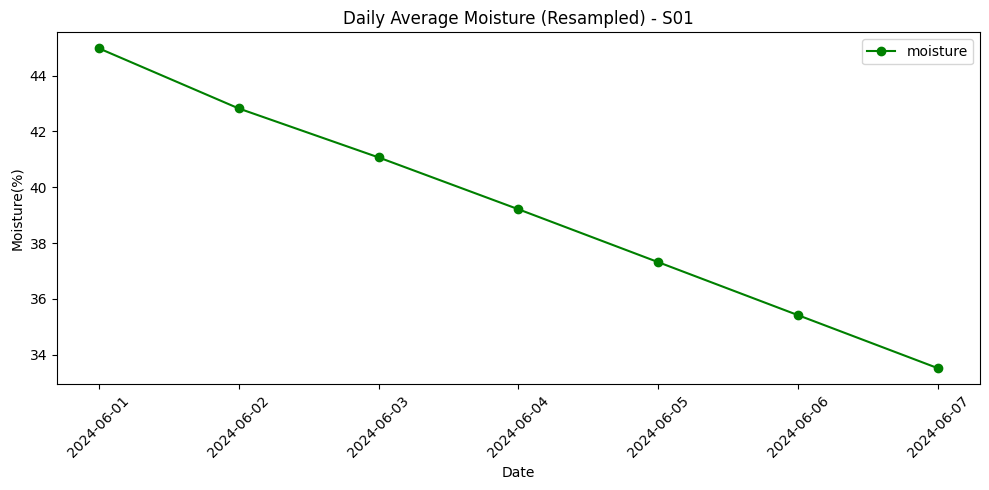

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

#Load sensor data with automatic time parsing
df = pd.read_csv("data/sensor_data_hourly.csv", parse_dates = ['timestamp'])


#Set timestamp as index for time-series operations
df = df.set_index('timestamp')

#Sort by time to ensure chronological order

df = df.sort_index()

print("First 5 rows:")
print(df.head())

print("Index info:")
print(df.index.dtype)

#Filtering for one Sensor

sensor = df[df['device_id']== 'S01'].copy()
print(f"Sensor S01 has {len(sensor)} hourly readings")

sensor['flow_rate'] = pd.to_numeric(sensor['flow_rate'], errors = 'coerce')
#RESAMPLE TO DAILY AVERAGES FOR EACH COLUMN

daily = sensor[['moisture','temperature','flow_rate']].resample("D").mean()
print("Dail averages for S01:")
print(daily.head(7))

#check the index

print("Daily index (days only):")
print(daily.index)


# VISUALIZATION PLOT

plt.figure(figsize = (10,5))
plt.plot(daily.index, daily['moisture'], marker ='o', label ='moisture', color = "green")
plt.title("Daily Average Moisture (Resampled) - S01")
plt.xlabel("Date")
plt.ylabel("Moisture(%)")
plt.xticks(rotation = 45)
plt.legend()
plt.tight_layout()
plt.show()
